<a href="https://colab.research.google.com/github/argyaWicaksana/PCVK-College/blob/main/Week9_pcvk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

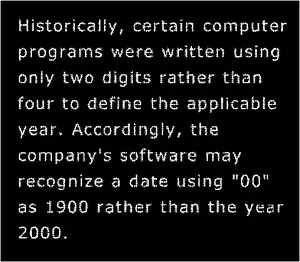

In [10]:
image1 = cv2.imread('/content/morphology.png')
cv2_imshow(image1)

Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element
Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
morphology.png)

In [11]:
def dilate_image(image, kernel):

  dilated_image = np.zeros(image.shape, dtype=np.uint8)
  height, width = image.shape

  for y in range(1, height - 1):
        for x in range(1, width - 1):
            dilated_image[y, x] = np.max(image[y-1:y+2, x-1:x+2] * kernel)

  return dilated_image

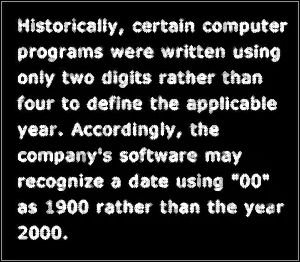

In [12]:
kernel = np.array([[0, 1, 0],
                  [1, 1, 1],
                  [0, 1, 0]], dtype=np.uint8)
image_gray = cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
cv2_imshow(dilate_image(image_gray, kernel))

Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED)
berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
morphology.png, dan cetak Structuring Element-nya)

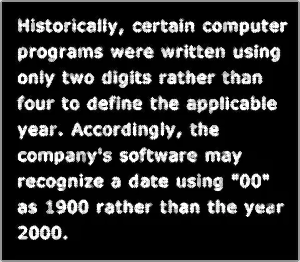

In [13]:
dilated_image = cv2.dilate(image1, kernel, iterations=1)
cv2_imshow(dilated_image)

Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element
Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
j.png)


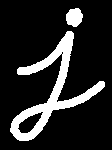

In [14]:
image_j = cv2.imread('/content/j.png')
cv2_imshow(image_j)

In [15]:
def erode_image(image, kernel):

  # Get the dimensions of the image and kernel
  image_height, image_width = image.shape
  kernel_height, kernel_width = kernel.shape
  kernel_center = (kernel_height // 2, kernel_width // 2)

  eroded_image = np.zeros((image_height, image_width), dtype=np.uint8)

  # Iterate through the image and perform erosion
  for y in range(image_height):
    for x in range(image_width):
      min_val = 255
      for ky in range(kernel_height):
        for kx in range(kernel_width):
          img_y = y + ky - kernel_center[0]
          img_x = x + kx - kernel_center[1]
          if img_y >= 0 and img_y < image_height and img_x >= 0 and img_x < image_width:
            if kernel[ky, kx] == 1 and image[img_y, img_x] < min_val:
              min_val = image[img_y, img_x]

      eroded_image[y, x] = min_val

  return eroded_image

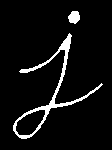

In [16]:
kernel = np.ones((5, 5), dtype=np.uint8)
image_j_gray = cv2.cvtColor(image_j,cv2.COLOR_BGR2GRAY)

cv2_imshow(erode_image(image_j_gray, kernel))

Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk
square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga
menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)


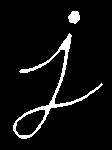

In [17]:
kernel = np.ones((5, 5), np.uint8)

eroded_image = cv2.erode(image_j, kernel, iterations=1)
cv2_imshow(eroded_image)

Buatlah program implementasi operasi opening dengan Structuring Element
berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
fingerprint.png)


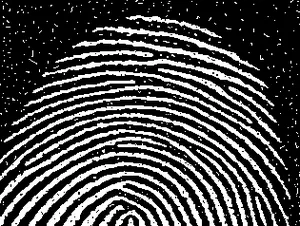

In [18]:
finger_img = cv2.imread('/content/fingerprint.png')

cv2_imshow(finger_img)

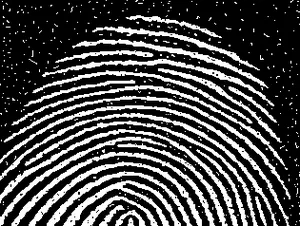

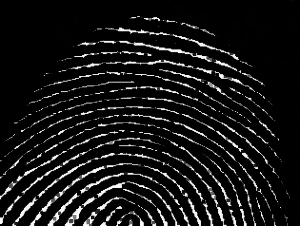

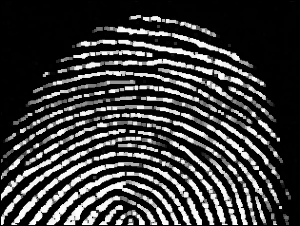

In [19]:
kernel = np.ones((3, 3), dtype=np.uint8)
finger_img_gray = cv2.cvtColor(finger_img,cv2.COLOR_BGR2GRAY)
cv2_imshow(finger_img_gray)

eroded_img = erode_image(finger_img_gray, kernel)
cv2_imshow(eroded_img)

opened_img = dilate_image(eroded_img, kernel)

cv2_imshow(opened_img)

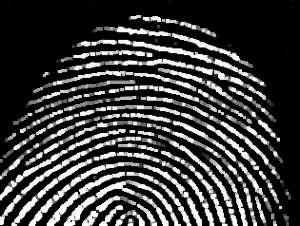

In [23]:
kernel = np.ones((3, 3), np.uint8)

# Perform the erosion operation
eroded_image = cv2.erode(finger_img, kernel, iterations=1)

opened_image = cv2.dilate(eroded_image, kernel, iterations=1)

cv2_imshow(opened_image)

Buatlah program implementasi operasi closing dengan Structuring Element berbentuk
square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
fingerprint.png)

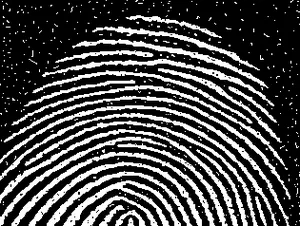

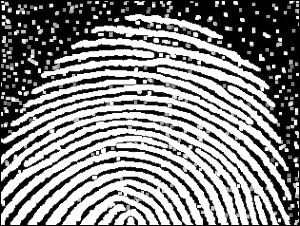

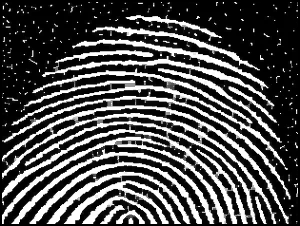

In [21]:
kernel = np.ones((3, 3), dtype=np.uint8)
finger_img_gray = cv2.cvtColor(finger_img,cv2.COLOR_BGR2GRAY)
cv2_imshow(finger_img_gray)

dilated_img = dilate_image(finger_img_gray, kernel)
cv2_imshow(dilated_img)

closed_img = erode_image(dilated_img, kernel)

cv2_imshow(closed_img)

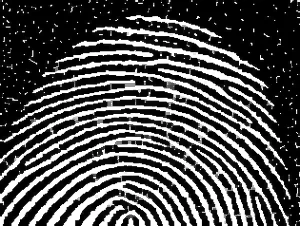

In [22]:
kernel = np.ones((3, 3), np.uint8)

# Perform the dilation operation
dilated_image = cv2.dilate(finger_img, kernel, iterations=1)

closed_image = cv2.erode(dilated_image, kernel, iterations=1)

cv2_imshow(closed_image)

Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Cross 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan
gambar j.png)


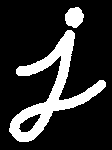

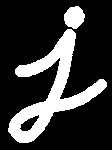

In [24]:
# Kernel Cross 3x3
kernel_3x3= cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
# Kernel Cross 5x5
kernel_5x5 = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))

# Dilate with kernel cross 3x3
dilation_cross3x3 = cv2.dilate(image_j, kernel_3x3, iterations=1)

# Dilate with kernel cross 5x5
dilation_cross5x5 = cv2.dilate(image_j, kernel_5x5, iterations=1)

cv2_imshow(dilation_cross3x3)
cv2_imshow(dilation_cross5x5)

Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Circular 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini:
(Gunakan gambar j.png)

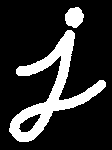

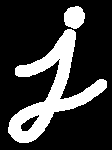

In [26]:
# Kernel Circular 3x3
kernel_circular3x3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))

# Kernel Circular 5x5
kernel_circular5x5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

# Dilate with kernel circular 3x3
dilation_circular3x3 = cv2.dilate(image_j, kernel_circular3x3, iterations=1)

# Dilate with kernel circular 5x5
dilation_circular5x5 = cv2.dilate(image_j, kernel_circular5x5, iterations=1)

cv2_imshow(dilation_circular3x3)
cv2_imshow(dilation_circular5x5)

Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Rectangle 3 x 5 dan 5 x 7, sehingga menghasilkan tampilan seperti di bawah ini:
(Gunakan gambar j.png)

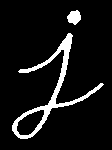

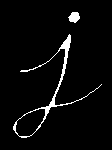

In [27]:
# Kernel Rectangle 3x5
kernel_rect3x5 = cv2.getStructuringElement(cv2.MORPH_RECT,(3,5))

# Kernel Rectangle 5x7
kernel_rect5x7 = cv2.getStructuringElement(cv2.MORPH_RECT,(5,7))

# Erode with kernel Rectangle 3x5
erosion_rect3x5 = cv2.erode(image_j, kernel_rect3x5, iterations=1)

# Erode with kernel Rectangle 5x7
erosion_rect5x7 = cv2.erode(image_j, kernel_rect5x7, iterations=1)

cv2_imshow(erosion_rect3x5)
cv2_imshow(erosion_rect5x7)

Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Line Vertikal 3 dan 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan
gambar j.png)

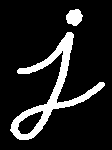

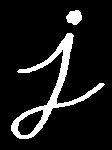

In [29]:
# Kernel Line Vertical 3
kernel_line_vert3 = np.ones((3, 1), dtype=np.uint8)

# Kernel Line Vertical 5
kernel_line_vert5 = np.ones((5, 1), dtype=np.uint8)

# Erode with kernel line vertical 3
erosion_line_vert3 = cv2.morphologyEx(image_j, cv2.MORPH_ERODE, kernel_line_vert3)

# Erode with kernel line vertical 5
erosion_line_vert5 = cv2.morphologyEx(image_j, cv2.MORPH_ERODE, kernel_line_vert5)

cv2_imshow(erosion_line_vert3)
cv2_imshow(erosion_line_vert5)